In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
df = pd.read_csv("C:/Users/zeyneb/Documents/kifiya_week1_assignment/raw_analyst_ratings/raw_analyst_ratings.csv")

df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [8]:
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [10]:
##basic statstics on headline length

df['headline_length'] = df['headline'].str.len()

# Calculate statistics
mean_length = df['headline_length'].mean()
median_length = df['headline_length'].median()
std_dev_length = df['headline_length'].std()
max_length = df['headline_length'].max()
min_length = df['headline_length'].min()

# Display results
print(f"Mean length: {mean_length}")
print(f"Median length: {median_length}")
print(f"Standard deviation: {std_dev_length}")
print(f"Max length: {max_length}")
print(f"Min length: {min_length}")


Mean length: 73.12051490484095
Median length: 64.0
Standard deviation: 40.73530993193006
Max length: 512
Min length: 3


In [12]:
## Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Convert to a DataFrame for better readability
publisher_activity = publisher_counts.reset_index()
publisher_activity.columns = ['publisher', 'article_count']

# Display top publishers
print("Most Active Publishers:")
print(publisher_activity.head(10))  # Show top 10 active publishers

# Save to CSV if needed
publisher_activity.to_csv("publisher_activity.csv", index=False)


Most Active Publishers:
           publisher  article_count
0      Paul Quintaro         228373
1         Lisa Levin         186979
2  Benzinga Newsdesk         150484
3      Charles Gross          96732
4      Monica Gerson          82380
5       Eddie Staley          57254
6         Hal Lindon          49047
7      ETF Professor          28489
8         Juan Lopez          28438
9     Benzinga Staff          28114


In [16]:
# Replace 'date_column' with the actual name of your date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [ ]:
# Extract year, month, day, weekday and hour
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'
df['hour'] = df['date'].dt.hour

In [19]:
yearly_trends = df['year'].value_counts().sort_index()
print(yearly_trends)

year
2011.0      760
2012.0     1187
2013.0     1240
2014.0     1189
2015.0     3695
2016.0     4223
2017.0     3581
2018.0     5395
2019.0     6325
2020.0    28392
Name: count, dtype: int64


In [20]:
monthly_trends = df['month'].value_counts().sort_index()
print(monthly_trends)

month
1.0      3068
2.0      4091
3.0      6391
4.0      6468
5.0     11363
6.0      7968
7.0      2131
8.0      2858
9.0      2417
10.0     3079
11.0     3210
12.0     2943
Name: count, dtype: int64


In [21]:
weekday_trends = df['weekday'].value_counts().sort_index()
print(weekday_trends)

weekday
Friday        9381
Monday       10322
Saturday       267
Sunday         436
Thursday     12688
Tuesday      11002
Wednesday    11891
Name: count, dtype: int64


In [22]:
day_trends = df['day'].value_counts().sort_index()
print(day_trends)

day
1.0     1792
2.0     1474
3.0     1848
4.0     1889
5.0     2484
6.0     2022
7.0     1948
8.0     2503
9.0     2006
10.0    2045
11.0    2440
12.0    2570
13.0    1879
14.0    1785
15.0    1490
16.0    1356
17.0    1389
18.0    1643
19.0    2027
20.0    1850
21.0    1667
22.0    1467
23.0    1673
24.0    1512
25.0    1030
26.0    1867
27.0    2209
28.0    2085
29.0    1767
30.0    1500
31.0     770
Name: count, dtype: int64


In [23]:
hourly_trends = df['hour'].value_counts().sort_index()
print(hourly_trends)

hour
0.0       67
1.0       14
2.0       57
3.0       93
4.0     1469
5.0     1829
6.0     2476
7.0     5033
8.0     5527
9.0     5965
10.0    7669
11.0    5701
12.0    5732
13.0    2710
14.0    2075
15.0    1612
16.0    3939
17.0    2800
18.0     704
19.0     227
20.0     131
21.0      82
22.0      48
23.0      27
Name: count, dtype: int64


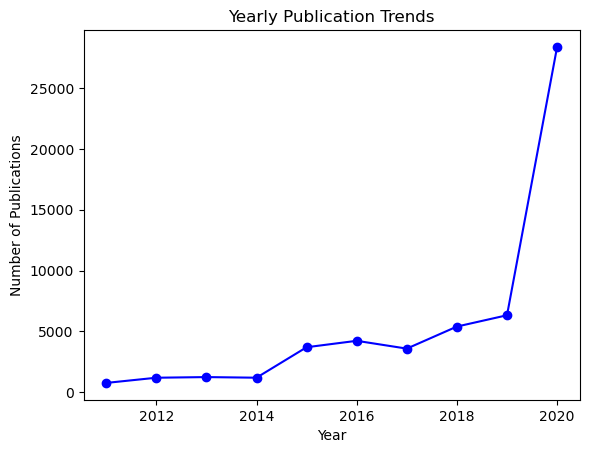

In [24]:
# Plot yearly trends
yearly_trends.plot(kind='line', marker='o', color='blue')
plt.title('Yearly Publication Trends')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

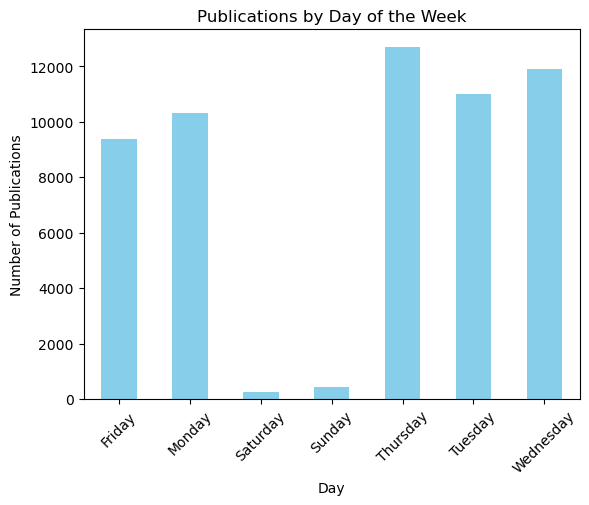

In [25]:
#plot weekday trends
weekday_trends.plot(kind='bar', color='skyblue')
plt.title('Publications by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.show()

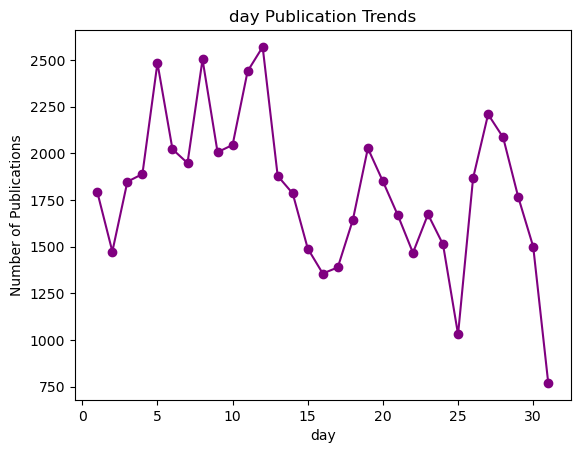

In [28]:
# Plot day trends
day_trends.plot(kind='line', marker='o', color='purple')
plt.title('day Publication Trends')
plt.xlabel('day')
plt.ylabel('Number of Publications')
plt.show()

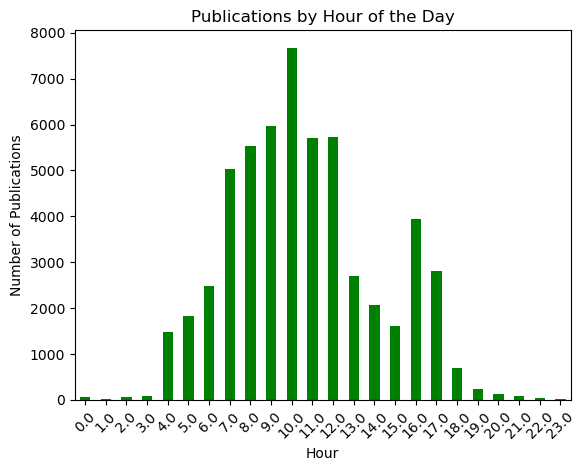

In [26]:
#plot hourly trends

hourly_trends.plot(kind='bar', color='green')
plt.title('Publications by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.show()

date
2011-04-27     1
2011-04-28     2
2011-04-29     2
2011-04-30     1
2011-05-01     1
              ..
2019-12-30    15
2019-12-31    11
2020-01-01     1
2020-01-02    13
2020-01-03    21
Name: count, Length: 2379, dtype: int64


Text(0, 0.5, 'Number of Publications')

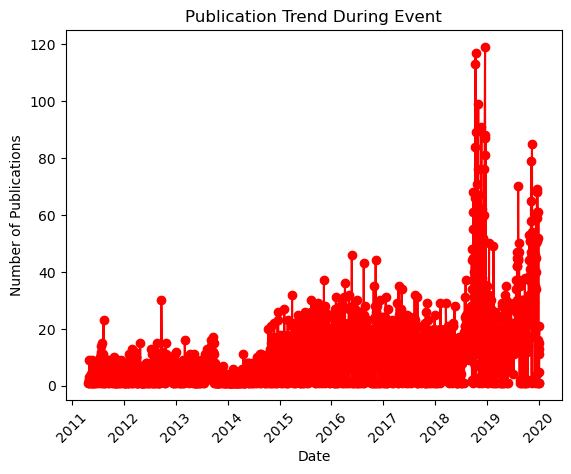

In [35]:
# Filter for a specific date range (e.g., during a major event)
event_start = '2011-01-01'
event_end = '2020-01-05'

event_data = df[(df['date'] >= event_start) & (df['date'] <= event_end)]

# Analyze publication counts during the event
event_trends = event_data['date'].dt.date.value_counts().sort_index()
print(event_trends)

# Plot the event trend
event_trends.plot(kind='line', marker='o', color='red')
plt.title('Publication Trend During Event')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Number of Publications')

In [36]:
from textblob import TextBlob

# Perform sentiment analysis
def analyze_sentiment(headline):
    analysis = TextBlob(headline)
    polarity = analysis.sentiment.polarity  # Ranges from -1 (negative) to 1 (positive)
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['headline'].apply(analyze_sentiment)

# View results
print(df)

# Count sentiment categories
sentiment_counts = df['sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)


         Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \
0        https://www.benzinga.

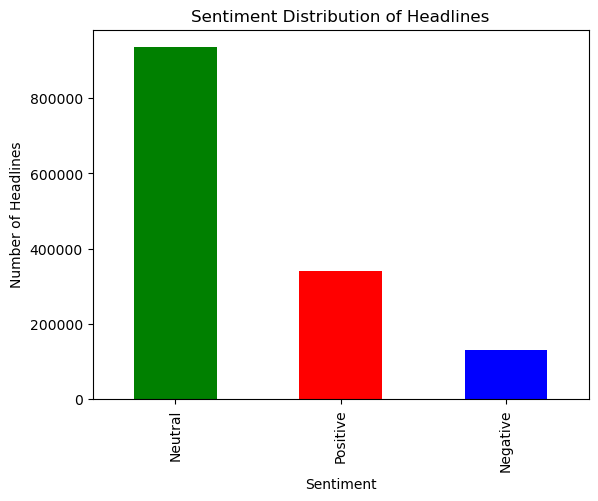

In [37]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution of Headlines")
plt.xlabel("Sentiment")
plt.ylabel("Number of Headlines")
plt.show()


In [39]:
###Use natural language processing to identify common keywords or phrases, 


import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

# Download NLTK stopwords (if not already installed)
nltk.download('stopwords')

# Ensure the column with headlines is correctly identified
headline = "headline"  # Replace with the actual column name
df[headline ]= df[headline].astype(str)  # Ensure data is string

# Step 1: Preprocess the text (convert to lower case, remove stopwords)
stop_words = set(stopwords.words("english"))

# Preprocessing function
def preprocess_text(text):
    # Tokenize, convert to lowercase, and remove stopwords
    words = text.lower().split()  # You can use more advanced tokenization if needed
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Apply preprocessing
df['clean_headlines'] = df[headline].apply(preprocess_text)

# Step 2: Extract keywords using TF-IDF
vectorizer = TfidfVectorizer(max_features=20, ngram_range=(1, 2))  # Unigrams and bigrams
X = vectorizer.fit_transform(df['clean_headlines'])

# Get feature names (keywords)
keywords = vectorizer.get_feature_names_out()

# Display the top keywords (sorted by TF-IDF score)
keyword_scores = X.sum(axis=0).A1  # Sum the scores of each feature (keyword)
top_keywords = sorted(zip(keywords, keyword_scores), key=lambda x: x[1], reverse=True)

print("Top Keywords:")
for keyword, score in top_keywords:
    print(f"{keyword}: {score}")

# Step 3: Extract Common Phrases (N-grams)
# N-grams help identify common multi-word phrases like "FDA approval", "price target", etc.
n = 2  # Bigram (2-word) phrases
bigrams = ngrams(" ".join(df['clean_headlines']).split(), n)
bigram_freq = Counter(bigrams)

print("\nTop Bigrams (Phrases):")
for phrase, freq in bigram_freq.most_common(10):
    print(f"{' '.join(phrase)}: {freq}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zeyneb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Keywords:
stocks: 114083.56937339473
market: 82501.13586897678
shares: 77557.01406397035
earnings: 75084.11110213868
vs: 65705.51807144671
update: 64685.846509548304
reports: 64076.33744961142
eps: 61168.3400015716
pt: 56877.081901398386
announces: 55957.1528081048
top: 55470.71830060015
week: 55242.71321710633
est: 53805.18838589593
benzinga: 52987.481855596
price: 52037.14968790582
buy: 49345.38355333974
downgrades: 47172.06274174128
sales: 46400.7005192512
trading: 43643.72525356451
mid: 42381.05942620123

Top Bigrams (Phrases):
price target: 46871
benzinga's top: 41986
stocks moving: 40015
market update:: 32075
earnings scheduled: 32054
initiates coverage: 28979
raises pt: 27202
shares several: 24077
companies trading: 23157
pre-market session: 21648
